## **İş Uygulaması: Şirket içi Eğitimin Performans Etkisi Ölçümü**

#### Problem: Belirli uğraşlar sonucunda alınan bir eğitimin katma değer sağlanıp sağlanmadığı ölçülmek isteniyor.
#### Detaylar: Bir departman bir konuda eğitim talep ediyor. Gerekli/gereksiz değerlendirmelerineticesinde eğitim alınıyor. Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor. Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniyor.

H0: müö=müs

H1: müö!=müs

In [2]:
import pandas as pd
import numpy as np

In [3]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,121,118,124,121,125,115,115,119,118,121,117,117,120,120,121,117,118,117,123,118,117,123,118,124,121,115,118,125,115])
sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,128,138,140,130,134,134,124,140,134,129,129,138,134,124,122,126,133,127,130,130,130,132,117,130,125,129,133,120,127,123])

In [4]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [5]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [6]:
#BİRİNCİ VERİ SETİ
AYRIK = pd.concat([oncesi,sonrasi],axis=1)
AYRIK.columns=["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n", AYRIK.head(),"\n\n")

#İKİNCİ VERİ SETİ
#ONCESİ FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESİ DEĞERLERİNİ BİR ARAYA GETİRME
A = pd.concat([oncesi,GRUP_ONCESI],axis=1)
#SONRASI FLAG/TAG'INI OLUŞTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEĞERLERİNİ BİR ARAYA GETİRME
B = pd.concat([sonrasi, GRUP_SONRASI],axis=1)

#TUM VERİYİ BİR ARAYA GETİRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

    ONCESI  SONRASI
0     123    118.0
1     119    127.0
2     119    122.0
3     116    132.0
4     123    129.0 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



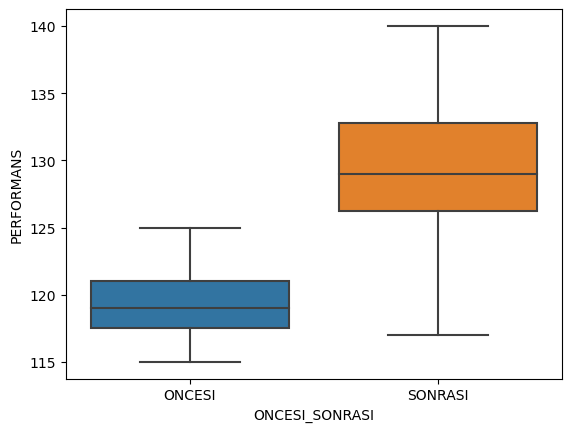

In [8]:
import seaborn as sns
sns.boxplot(x="ONCESI_SONRASI",y="PERFORMANS",data=BIRLIKTE);
import matplotlib.pyplot as plt
plt.show()

### **Varsayım Kontrolleri**

In [9]:
from scipy.stats import shapiro

In [10]:
shapiro(AYRIK.ONCESI)

ShapiroResult(statistic=0.9510661363601685, pvalue=0.06520283222198486)

In [11]:
shapiro(AYRIK.SONRASI)

ShapiroResult(statistic=nan, pvalue=1.0)

In [12]:
import scipy.stats as stats
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI)

LeveneResult(statistic=nan, pvalue=nan)

### **Hipotez Testi**

In [13]:
stats.ttest_rel(AYRIK.ONCESI,AYRIK.SONRASI)

Ttest_relResult(statistic=nan, pvalue=nan)

In [18]:
test_istatistigi, pvalue = stats.ttest_rel(AYRIK["ONCESI"],AYRIK["SONRASI"])
print('Test İstatistiği = %.5f, p-değeri=%.5f' % (test_istatistigi, pvalue))

Test İstatistiği = nan, p-değeri=nan


### **Nonparametrik İki Örneklem T Testi**

In [19]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=nan, pvalue=nan)

In [20]:
test_istatistigi,pvalue=stats.wilcoxon(AYRIK["ONCESI"],AYRIK["SONRASI"])

print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi,pvalue))

Test İstatistiği = nan, p-değeri = nan


### **İki Örneklem Oran Testi**

#### iki oran arasında karşılaştırma yapmak için kullanılır

H0:  P1=P2    H0:  P1<=P2    H0:  P1>=P2

H1:  P1!=P2    H1:  P1>P2    H1:  P1<P2
                                        
varsayımlar
                                        
n1>30

n2>30